## Importações e seleção dos dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

In [3]:
df1 = pd.read_csv('base_rotulos.csv')

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/184671249.py:1: DtypeWarning: Columns (12,24,32,33,34,82,83,84,95,96,97,98,111,158,159,164,176,177,178,179,180,189,203,204,213,235,255,261) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('base_rotulos.csv')


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Columns: 335 entries, nquest to PESOE
dtypes: int64(124), object(211)
memory usage: 14.9+ MB


In [5]:
df1 = df1[['nquest', 'idade1', 'faixa etária', 'sexo', 'cor', 'REGIAO', 'RCLASSE2', 'estcivil', 'renda', 'escola', 'nfilhos', 'p52aa', 'p55', 'p56', 'p66', 'p64g', 'p64h' ]]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nquest        5814 non-null   int64 
 1   idade1        5814 non-null   int64 
 2   faixa etária  5814 non-null   object
 3   sexo          5814 non-null   object
 4   cor           5814 non-null   object
 5   REGIAO        5814 non-null   object
 6   RCLASSE2      5814 non-null   object
 7   estcivil      5814 non-null   object
 8   renda         5814 non-null   object
 9   escola        5814 non-null   object
 10  nfilhos       5814 non-null   int64 
 11  p52aa         5814 non-null   object
 12  p55           5814 non-null   object
 13  p56           5814 non-null   object
 14  p66           5814 non-null   object
 15  p64g          5814 non-null   object
 16  p64h          5814 non-null   object
dtypes: int64(3), object(14)
memory usage: 772.3+ KB


In [7]:
df2 = pd.read_csv('base_valores.csv')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Columns: 335 entries, nquest to PESOE
dtypes: int64(333), object(2)
memory usage: 14.9+ MB


In [9]:
df2 = df2[['nquest', 'rendacat', 'escolacat', 'p64b', 'p64gn', 'p64hn', 'p52aan', 'p55n', 'p56n' ]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   nquest     5814 non-null   int64
 1   rendacat   5814 non-null   int64
 2   escolacat  5814 non-null   int64
 3   p64b       5814 non-null   int64
 4   p64gn      5814 non-null   int64
 5   p64hn      5814 non-null   int64
 6   p52aan     5814 non-null   int64
 7   p55n       5814 non-null   int64
 8   p56n       5814 non-null   int64
dtypes: int64(9)
memory usage: 408.9 KB


## Trabalhando no df

In [10]:
df_invest = pd.merge(df1, df2, on=['nquest'], how='inner')

In [11]:
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nquest        5814 non-null   int64 
 1   idade1        5814 non-null   int64 
 2   faixa etária  5814 non-null   object
 3   sexo          5814 non-null   object
 4   cor           5814 non-null   object
 5   REGIAO        5814 non-null   object
 6   RCLASSE2      5814 non-null   object
 7   estcivil      5814 non-null   object
 8   renda         5814 non-null   object
 9   escola        5814 non-null   object
 10  nfilhos       5814 non-null   int64 
 11  p52aa         5814 non-null   object
 12  p55           5814 non-null   object
 13  p56           5814 non-null   object
 14  p66           5814 non-null   object
 15  p64g          5814 non-null   object
 16  p64h          5814 non-null   object
 17  rendacat      5814 non-null   int64 
 18  escolacat     5814 non-null   int64 
 19  p64b  

In [12]:
df_invest['perfil'] = df_invest['p66'].apply(lambda x: 'apostador' if x == 'Frequentemente' else 'investidor')

In [13]:
df_invest

,nquest,idade1,faixa etária,sexo,cor,REGIAO,RCLASSE2,estcivil,renda,escola,...,p64h,rendacat,escolacat,p64b,p64gn,p64hn,p52aan,p55n,p56n,perfil
0,192956123,54,45-59,Feminino,Preta,Nordeste,D/E,Viuvo(a),"Até R$ 1.320,00",Fundamental II completo,...,Concorda Totalmente,9,3,5,5,5,0,2,0,investidor
1,192957178,67,60+,Feminino,Branca,Nordeste,D/E,Viuvo(a),"De R$ 1.321,00 Até R$ 2.640,00",Analfabeto/ Fundamental I incompleto,...,Discorda Totalmente,1,1,5,5,1,0,2,0,investidor
2,192958083,44,35-44,Feminino,Preta,Nordeste,C2,Casado(a)/com companheiro(a),"Até R$ 1.320,00",Ensino Médio completo,...,Discorda Totalmente,9,5,5,1,1,0,0,0,investidor
3,192958117,35,35-44,Feminino,Parda,Nordeste,D/E,Solteiro (a),"Até R$ 1.320,00",Fundamental I completo/ Fundamental II incompleto,...,Discorda Totalmente,9,2,5,5,1,5,0,0,investidor
4,192958632,69,60+,Feminino,Parda,Nordeste,C2,Separado/Divorciado,Recusa,Ensino Médio completo,...,Discorda Totalmente,97,5,1,1,1,96,0,0,investidor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,193921867,50,45-59,Masculino,Branca,Sul,B2,Solteiro (a),"De R$ 3.961,00 Até R$ 6.600,00",Pós-graduação,...,Discorda Totalmente,3,8,2,1,1,8,0,0,investidor
5810,193921868,29,25-34,Feminino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 2.640,00 Até R$ 3.960,00",Ensino Médio completo,...,Discorda Totalmente,2,5,5,2,1,0,1,98,investidor
5811,193921869,28,25-34,Masculino,Parda,Sul,C1,Separado/Divorciado,"De R$ 1.321,00 Até R$ 2.640,00",Fundamental I completo/ Fundamental II incompleto,...,Discorda Totalmente,1,2,5,4,1,0,1,1,investidor
5812,193925879,54,45-59,Feminino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 2.640,00 Até R$ 3.960,00",Fundamental II completo,...,Discorda Totalmente,2,3,5,1,1,0,2,0,investidor


In [14]:
df_invest['perfil binário'] = df_invest['perfil'].apply(lambda x: '1' if x == 'apostador' else '0')

In [15]:
df_invest

,nquest,idade1,faixa etária,sexo,cor,REGIAO,RCLASSE2,estcivil,renda,escola,...,rendacat,escolacat,p64b,p64gn,p64hn,p52aan,p55n,p56n,perfil,perfil binário
0,192956123,54,45-59,Feminino,Preta,Nordeste,D/E,Viuvo(a),"Até R$ 1.320,00",Fundamental II completo,...,9,3,5,5,5,0,2,0,investidor,0
1,192957178,67,60+,Feminino,Branca,Nordeste,D/E,Viuvo(a),"De R$ 1.321,00 Até R$ 2.640,00",Analfabeto/ Fundamental I incompleto,...,1,1,5,5,1,0,2,0,investidor,0
2,192958083,44,35-44,Feminino,Preta,Nordeste,C2,Casado(a)/com companheiro(a),"Até R$ 1.320,00",Ensino Médio completo,...,9,5,5,1,1,0,0,0,investidor,0
3,192958117,35,35-44,Feminino,Parda,Nordeste,D/E,Solteiro (a),"Até R$ 1.320,00",Fundamental I completo/ Fundamental II incompleto,...,9,2,5,5,1,5,0,0,investidor,0
4,192958632,69,60+,Feminino,Parda,Nordeste,C2,Separado/Divorciado,Recusa,Ensino Médio completo,...,97,5,1,1,1,96,0,0,investidor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,193921867,50,45-59,Masculino,Branca,Sul,B2,Solteiro (a),"De R$ 3.961,00 Até R$ 6.600,00",Pós-graduação,...,3,8,2,1,1,8,0,0,investidor,0
5810,193921868,29,25-34,Feminino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 2.640,00 Até R$ 3.960,00",Ensino Médio completo,...,2,5,5,2,1,0,1,98,investidor,0
5811,193921869,28,25-34,Masculino,Parda,Sul,C1,Separado/Divorciado,"De R$ 1.321,00 Até R$ 2.640,00",Fundamental I completo/ Fundamental II incompleto,...,1,2,5,4,1,0,1,1,investidor,0
5812,193925879,54,45-59,Feminino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 2.640,00 Até R$ 3.960,00",Fundamental II completo,...,2,3,5,1,1,0,2,0,investidor,0


In [16]:
df_invest.to_csv('base_final.csv', index=False)

## Entendendo os dados

In [17]:
df_invest.isnull().sum()

nquest            0
idade1            0
faixa etária      0
sexo              0
cor               0
REGIAO            0
RCLASSE2          0
estcivil          0
renda             0
escola            0
nfilhos           0
p52aa             0
p55               0
p56               0
p66               0
p64g              0
p64h              0
rendacat          0
escolacat         0
p64b              0
p64gn             0
p64hn             0
p52aan            0
p55n              0
p56n              0
perfil            0
perfil binário    0
dtype: int64

In [18]:
df_invest.dtypes

nquest             int64
idade1             int64
faixa etária      object
sexo              object
cor               object
REGIAO            object
RCLASSE2          object
estcivil          object
renda             object
escola            object
nfilhos            int64
p52aa             object
p55               object
p56               object
p66               object
p64g              object
p64h              object
rendacat           int64
escolacat          int64
p64b               int64
p64gn              int64
p64hn              int64
p52aan             int64
p55n               int64
p56n               int64
perfil            object
perfil binário    object
dtype: object

In [19]:
df_invest.describe().T

,count,mean,std,min,25%,50%,75%,max
nquest,5814.0,1.932473e+08,194582.029632,192956123.0,1.930918e+08,193176180.0,1.933947e+08,193925880.0
idade1,5814.0,4.113158e+01,16.320284,16.0,2.700000e+01,40.0,5.400000e+01,90.0
nfilhos,5814.0,1.517028e+00,1.626051,0.0,0.000000e+00,1.0,2.000000e+00,10.0
rendacat,5814.0,9.498280e+00,20.066608,1.0,1.000000e+00,4.0,9.000000e+00,99.0
escolacat,5814.0,4.400585e+00,1.800569,1.0,3.000000e+00,5.0,5.000000e+00,8.0
p64b,5814.0,4.543516e+00,4.966679,1.0,4.000000e+00,5.0,5.000000e+00,99.0
p64gn,5814.0,2.767458e+00,6.651658,1.0,1.000000e+00,1.0,4.000000e+00,99.0
p64hn,5814.0,2.424321e+00,4.699616,1.0,1.000000e+00,1.0,4.000000e+00,99.0
p52aan,5814.0,4.602683e+00,17.895737,0.0,0.000000e+00,0.0,1.000000e+00,99.0
p55n,5814.0,9.898521e-01,0.916279,0.0,0.000000e+00,1.0,2.000000e+00,2.0


In [20]:
investidores = df_invest[df_invest['perfil binário'] == '0']
investidores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5611 entries, 0 to 5813
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nquest          5611 non-null   int64 
 1   idade1          5611 non-null   int64 
 2   faixa etária    5611 non-null   object
 3   sexo            5611 non-null   object
 4   cor             5611 non-null   object
 5   REGIAO          5611 non-null   object
 6   RCLASSE2        5611 non-null   object
 7   estcivil        5611 non-null   object
 8   renda           5611 non-null   object
 9   escola          5611 non-null   object
 10  nfilhos         5611 non-null   int64 
 11  p52aa           5611 non-null   object
 12  p55             5611 non-null   object
 13  p56             5611 non-null   object
 14  p66             5611 non-null   object
 15  p64g            5611 non-null   object
 16  p64h            5611 non-null   object
 17  rendacat        5611 non-null   int64 
 18  escolacat    

In [21]:
apostadores = df_invest[df_invest['perfil binário'] == '1']
apostadores

,nquest,idade1,faixa etária,sexo,cor,REGIAO,RCLASSE2,estcivil,renda,escola,...,rendacat,escolacat,p64b,p64gn,p64hn,p52aan,p55n,p56n,perfil,perfil binário
43,192963673,20,16-24,Masculino,Outras,Nordeste,B2,Solteiro (a),"De R$ 1.321,00 Até R$ 2.640,00",Ensino Médio completo,...,1,5,5,1,1,0,1,3,apostador,1
74,192967196,48,45-59,Masculino,Parda,Sudeste,C2,Casado(a)/com companheiro(a),"Até R$ 1.320,00",Fundamental II completo,...,9,3,5,5,1,0,1,3,apostador,1
76,192967724,54,45-59,Feminino,Branca,Nordeste,D/E,Viuvo(a),"Até R$ 1.320,00",Ensino Médio incompleto,...,9,4,5,4,4,0,2,0,apostador,1
87,192969677,29,25-34,Masculino,Parda,Nordeste,B2,Separado/Divorciado,"De R$ 2.640,00 Até R$ 3.960,00",Ensino Médio completo,...,2,5,5,5,5,0,2,0,apostador,1
92,192970503,30,25-34,Masculino,Preta,Sudeste,C1,Solteiro (a),"De R$ 3.961,00 Até R$ 6.600,00",Ensino Médio completo,...,3,5,5,4,5,2,0,0,apostador,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,193724175,26,25-34,Masculino,Preta,Sul,D/E,Solteiro (a),"De R$ 1.321,00 Até R$ 2.640,00",Fundamental I completo/ Fundamental II incompleto,...,1,2,5,1,4,0,2,0,apostador,1
5737,193768542,44,35-44,Masculino,Preta,Sul,C1,Casado(a)/com companheiro(a),"Até R$ 1.320,00",Fundamental II completo,...,9,3,5,5,5,0,2,0,apostador,1
5777,193857823,17,16-24,Masculino,Parda,Sul,C1,Solteiro (a),"Até R$ 1.320,00",Ensino Médio incompleto,...,9,4,5,1,1,0,1,12,apostador,1
5798,193874109,25,25-34,Masculino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 1.321,00 Até R$ 2.640,00",Ensino Médio completo,...,1,5,5,1,5,1,0,0,apostador,1


In [22]:
apostadores.to_csv('base_final_apostadores.csv', index=False)

## Análise do Perfil

### idade

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/135584473.py:5: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.countplot(data = apostadores,


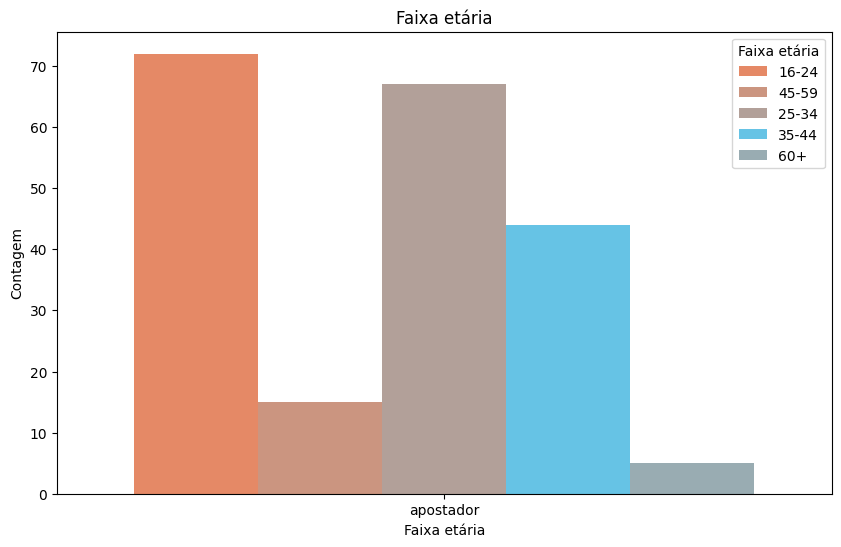

In [23]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))
cores = ['#fa7f51', '#d88f73', '#b69e95', '#51cdfa', '#95aeb6', '#73bdd8','#fe9f51', '#e99f73', '#c98e95', '#72beda', '#95cec9', '#85fdd8' ]

sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'faixa etária',
              palette = cores,
              legend = True)

# definir texto do título e eixos x e y

plt.title('Faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

In [24]:
apostadores['faixa etária'].value_counts(normalize = True)

faixa etária
16-24    0.354680
25-34    0.330049
35-44    0.216749
45-59    0.073892
60+      0.024631
Name: proportion, dtype: float64

### renda

In [25]:
apostadores['renda'].value_counts(normalize=True)

renda
Até R$ 1.320,00                     0.305419
De R$ 1.321,00 Até R$ 2.640,00      0.295567
De R$ 2.640,00 Até R$ 3.960,00      0.192118
De R$ 3.961,00 Até R$ 6.600,00      0.103448
De R$ 6.601,00 Até R$ 13.200,00     0.039409
Não sabe                            0.024631
De R$ 13.201,00 Até R$ 26.400,00    0.019704
Recusa                              0.014778
R$ 66.001,00 ou mais                0.004926
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/4185214137.py:4: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  sns.countplot(data = apostadores,


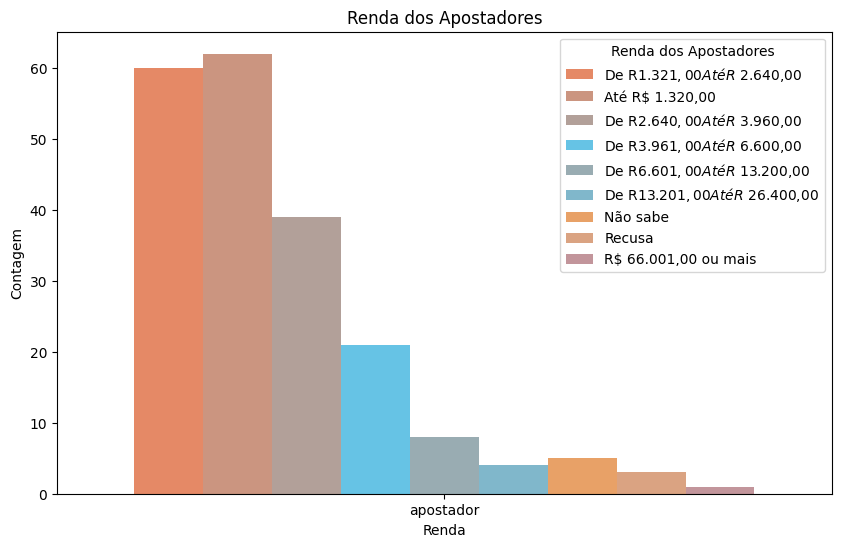

In [26]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'renda',
              palette = cores,
              legend = True)

# definir texto do título e eixos x e y

plt.title('Renda dos Apostadores')
plt.xlabel('Renda')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Renda dos Apostadores')

plt.show()

### Classe social 

In [27]:
apostadores['RCLASSE2'].value_counts(normalize=True)

RCLASSE2
C2     0.251232
B2     0.221675
C1     0.201970
D/E    0.187192
A      0.068966
B1     0.068966
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/3173920380.py:5: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(data = apostadores,


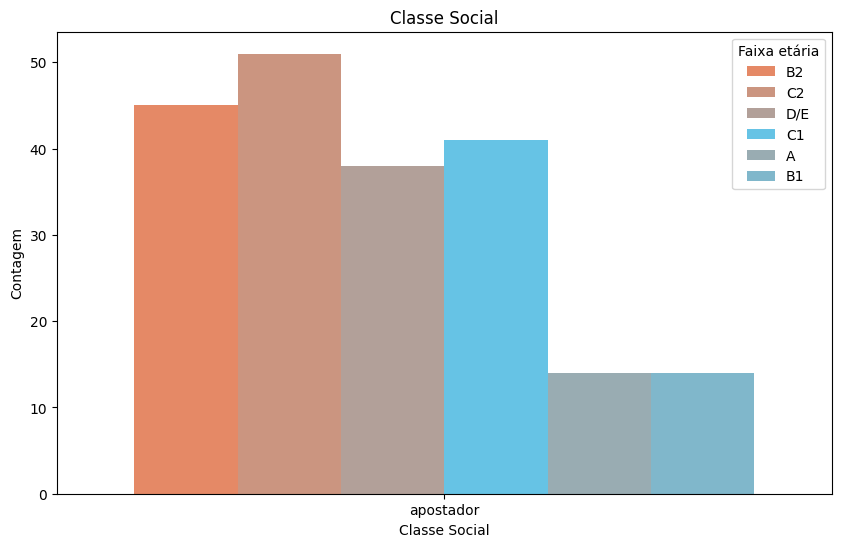

In [28]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'RCLASSE2',
              palette = cores,
              legend = True)

# definir texto do título e eixos x e y

plt.title('Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

### genero 

In [49]:
apostadores['sexo'].value_counts(normalize=True)


sexo
Masculino    0.753695
Feminino     0.246305
Name: proportion, dtype: float64

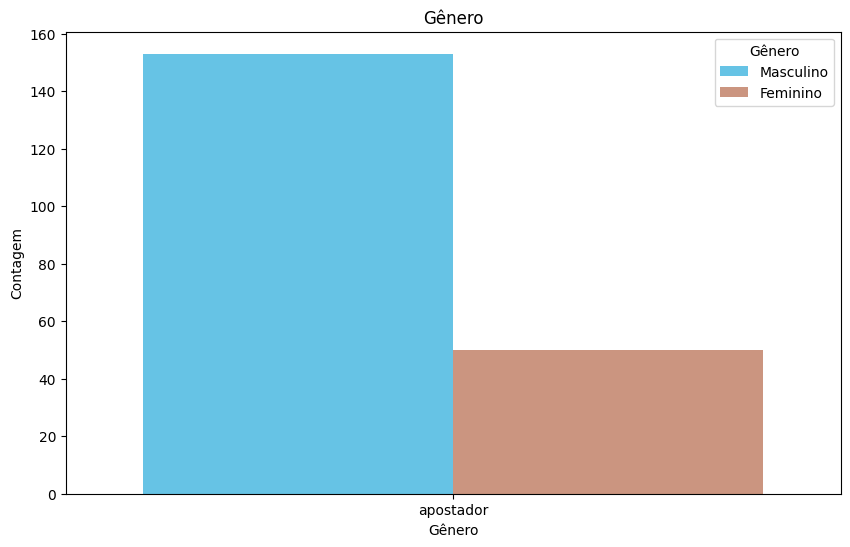

In [30]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))
colores = ['#51cdfa', '#d88f73']

sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'sexo',
              palette = colores)

# definir texto do título e eixos x e y

plt.title('Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Gênero')

plt.show()

### regiao 

In [50]:
apostadores['REGIAO'].value_counts(normalize=True)

REGIAO
Sudeste         0.413793
Nordeste        0.344828
Sul             0.118227
Norte           0.083744
Centro Oeste    0.039409
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/1465645378.py:5: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.countplot(data = apostadores,


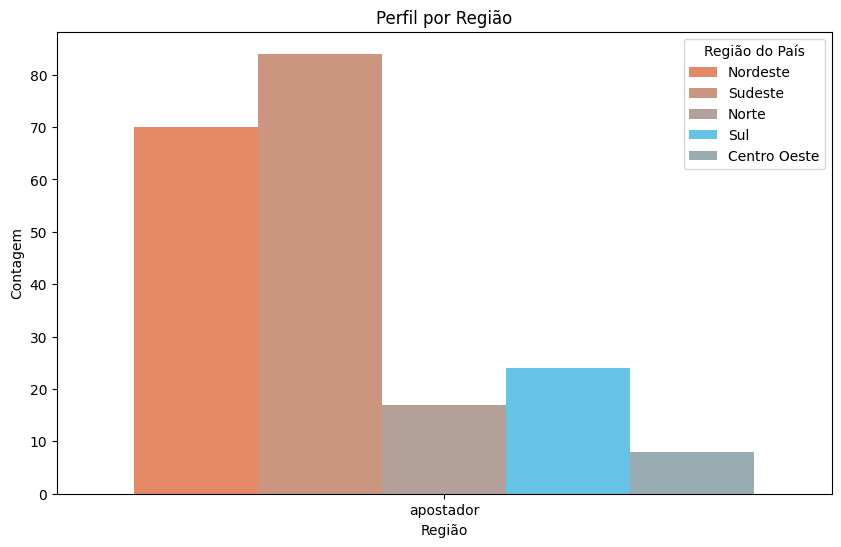

In [32]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'REGIAO',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Perfil por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Região do País')

plt.show()

### Escolaridade 

In [51]:
apostadores['escola'].value_counts(normalize=True)


escola
Ensino Médio completo                                0.492611
Ensino Médio incompleto                              0.211823
Fundamental I completo/ Fundamental II incompleto    0.083744
Superior incompleto                                  0.078818
Superior completo                                    0.054187
Fundamental II completo                              0.034483
Pós-graduação                                        0.029557
Analfabeto/ Fundamental I incompleto                 0.014778
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/3825365208.py:5: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.countplot(data = apostadores,


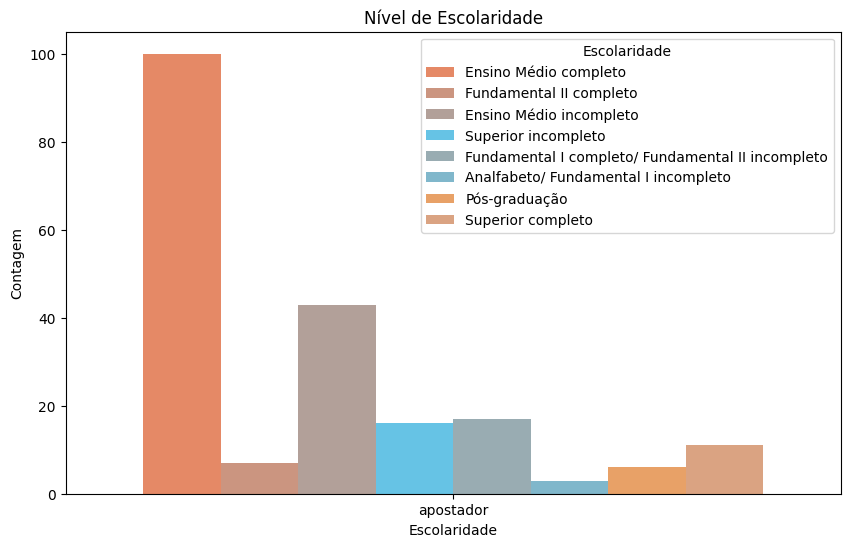

In [34]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'escola',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Nível de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Escolaridade')

plt.show()

### Raça

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/2392829255.py:5: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(data = apostadores,


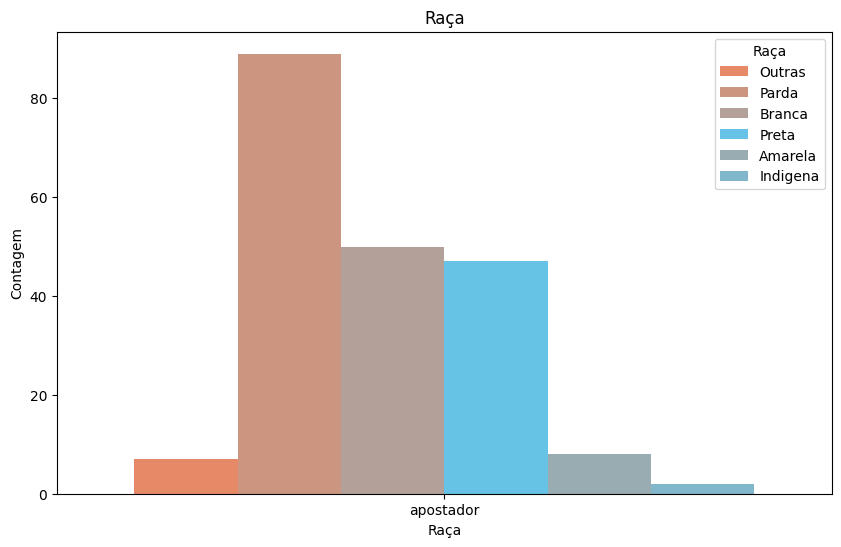

In [35]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'cor',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Raça')

plt.show()

In [36]:
perfil_raca = pd.pivot_table(apostadores, index='perfil', columns='cor', aggfunc='size', fill_value=0)
perfil_raca

cor,Amarela,Branca,Indigena,Outras,Parda,Preta
perfil,,,,,,
apostador,8,50,2,7,89,47


In [37]:
perfil_raca_porcentagem = perfil_raca.div(perfil_raca.sum(axis=1), axis=0)*100
perfil_raca_porcentagem

cor,Amarela,Branca,Indigena,Outras,Parda,Preta
perfil,,,,,,
apostador,3.940887,24.630542,0.985222,3.448276,43.842365,23.152709


In [38]:
apostadores['cor'].value_counts(normalize=True)

cor
Parda       0.438424
Branca      0.246305
Preta       0.231527
Amarela     0.039409
Outras      0.034483
Indigena    0.009852
Name: proportion, dtype: float64

### Estado Civil

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/2053388287.py:5: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.countplot(data = apostadores,


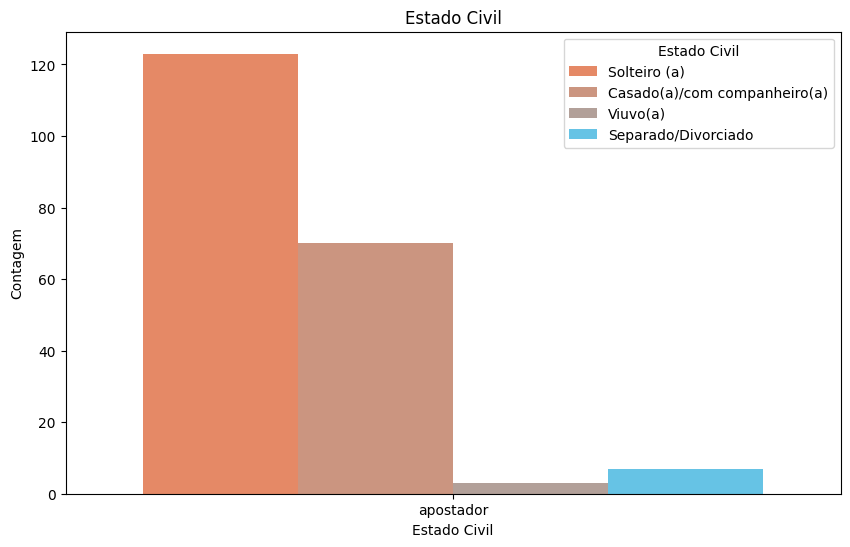

In [39]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'estcivil',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Estado Civil')

plt.show()

### Quantidade de filhos vs perfil

In [40]:
apostadores['nfilhos'].value_counts(normalize = True)

nfilhos
0    0.507389
1    0.226601
2    0.147783
3    0.068966
4    0.024631
6    0.014778
9    0.004926
5    0.004926
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/2998578110.py:5: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.countplot(data = apostadores,


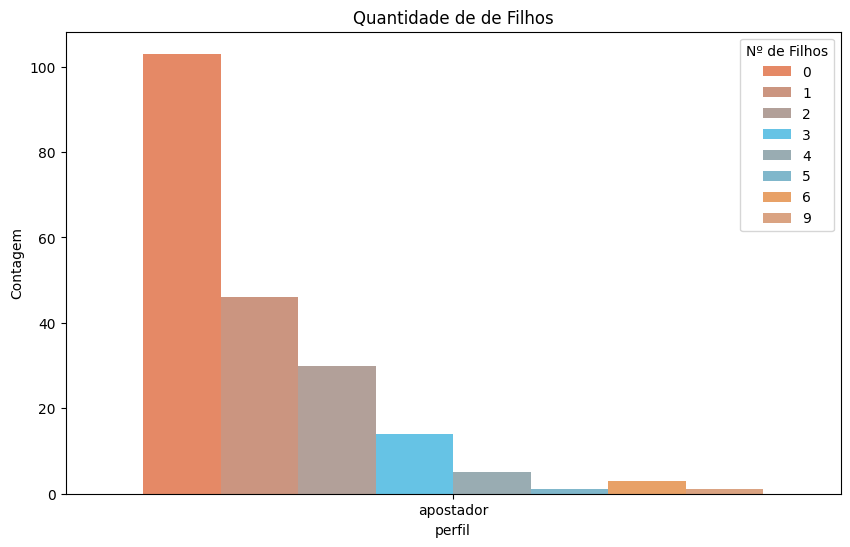

In [41]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = apostadores,
              x = 'perfil', 
              hue = 'nfilhos',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Quantidade de de Filhos')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Nº de Filhos')

plt.show()

## Como se informam

#### canais

In [43]:
#p52aa- quais canais usa para se informar? 

canais = apostadores[apostadores['p52aa'] != '0']

canais['p52aa'].value_counts(normalize=True)


p52aa
Youtube          0.404762
Instagram        0.273810
WhatsApp         0.107143
Portal / site    0.059524
Televisao        0.047619
Linkedin         0.023810
Telegram         0.023810
Podcasts         0.023810
Nenhum           0.011905
E-mail           0.011905
Facebook         0.011905
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/2676317396.py:5: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.countplot(data = canais,


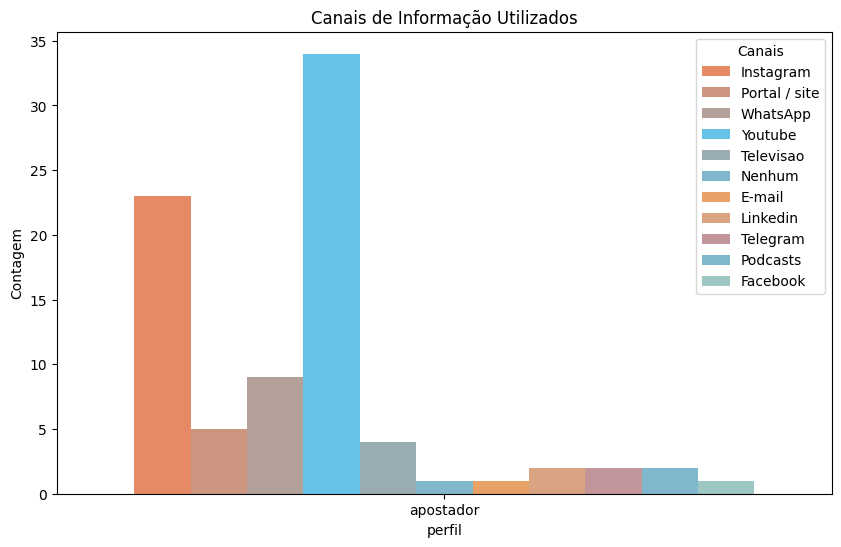

In [44]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = canais,
              x = 'perfil', 
              hue = 'p52aa',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Canais de Informação Utilizados')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Canais')

plt.show()

#### busca infos

In [45]:
#p55 - você já chegou a procurar informações e dicas sobre onde aplicar dinheiro?
buscou = apostadores[apostadores['p55'] != '0']

buscou.groupby('perfil')['p55'].value_counts(normalize=True)

perfil     p55
apostador  Nao    0.612613
           Sim    0.387387
Name: proportion, dtype: float64

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/4034520392.py:5: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data = buscou,


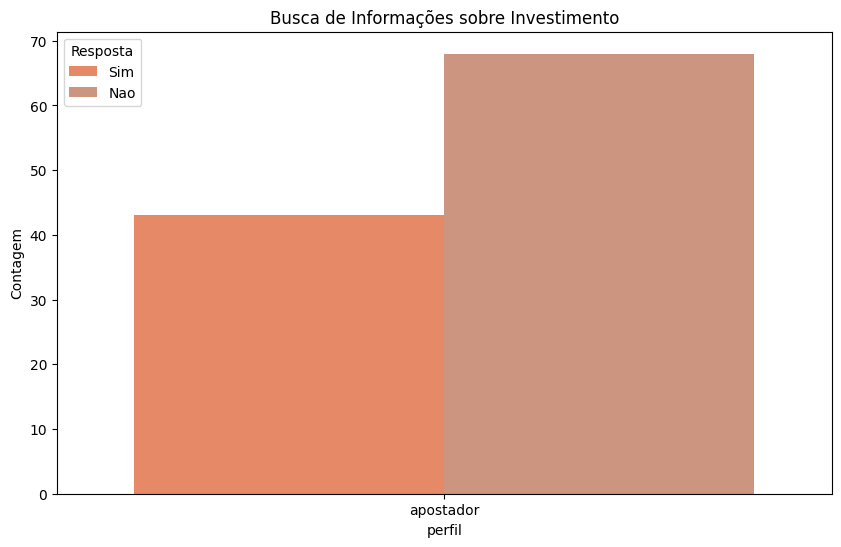

In [46]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = buscou,
              x = 'perfil', 
              hue = 'p55',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Busca de Informações sobre Investimento')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Resposta')

plt.show()

#### Onde busca

In [47]:
#p56 - onde buscou essas informações?
onde = apostadores[apostadores['p56'] != '0']

onde['p56'].value_counts(normalize=True)

p56
Internet/ Google/ Redes Sociais (Facebook, Instagram)/ YouTube                                                              0.325581
Amigos/ Parentes                                                                                                            0.279070
Sites de noticias                                                                                                           0.232558
Aplicativos de corretoras e investimentos (do banco/ bancos digitais)                                                       0.046512
Presencialmente, ou seja, falando com o gerente ou com o assessor/ especialista de investimento. (presencialmente na age    0.046512
Cursos/ cursos online/ palestras/ na faculdade/ escola/ professor                                                           0.023256
Outras respostas                                                                                                            0.023256
Banco/ gerente de banco (sem especificar)                        

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_40020/1049565521.py:5: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.countplot(data = onde,


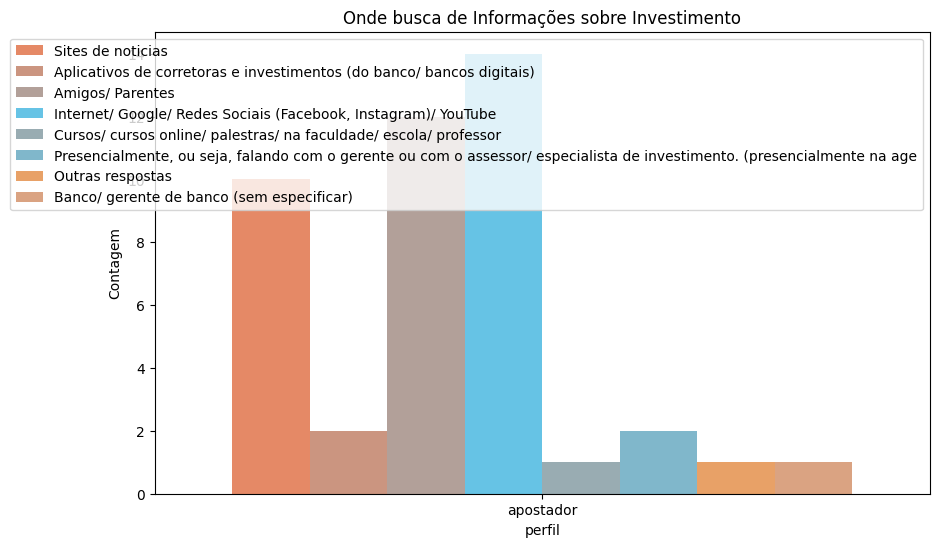

In [48]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = onde,
              x = 'perfil', 
              hue = 'p56',
              palette = cores)

# definir texto do título e eixos x e y

plt.title('Onde busca de Informações sobre Investimento')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(loc='best')

plt.show()